In [40]:
import pandas as pd
import numpy as np
import os
from PIL import Image, ImageDraw
from ast import literal_eval
import matplotlib.pyplot as plt

In [41]:
root_path = '../path'
train_folder = os.path.join(root_path, "train")
test_folder = os.path.join(root_path, "test")
train_csv_path = os.path.join(root_path, "train.csv")
sample_submission = os.path.join(root_path, "sample_submission.csv")

In [43]:
df = pd.read_csv(train_csv_path)
df.head()

image_id  width  height                         bbox   source
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1

In [44]:
df.shape[0]

147793

In [45]:
df.shape[1]

5

In [46]:
df['width'].unique() == df['height'].unique() == [1024]

array([ True])

In [47]:
def get_bbox_area(bbox):
    bbox = literal_eval(bbox)
    return bbox[2] * bbox[3]

In [48]:
df['bbox_area'] = df['bbox'].apply(get_bbox_area)

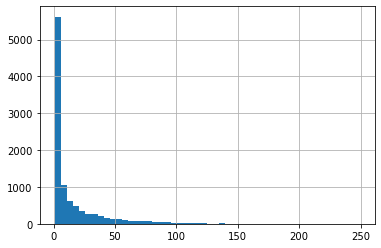

In [49]:
df['bbox_area'].value_counts().hist(bins=50)

In [50]:
unique_images = df['image_id'].unique()

In [51]:
num_total = len(os.listdir(train_folder))
num_annotated = len(unique_images)
print(f"There are {num_annotated} annotated images and {num_total - num_annotated} images without annotations.")

There are 3373 annotated images and 49 images without annotations.


In [52]:
sources = df['source'].unique()
print(f"There are {len(sources)} sources of data: {sources}")

There are 7 sources of data: ['usask_1' 'arvalis_1' 'inrae_1' 'ethz_1' 'arvalis_3' 'rres_1' 'arvalis_2']


In [53]:
df['source'].value_counts()

ethz_1       51489
arvalis_1    45716
rres_1       20236
arvalis_3    16665
usask_1       5807
arvalis_2     4179
inrae_1       3701
Name: source, dtype: int64

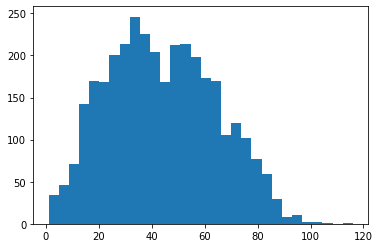

In [54]:
plt.hist(df['image_id'].value_counts(), bins=30)
plt.show()

In [56]:
def show_images(images, num = 5):
    
    images_to_show = np.random.choice(images, num)

    for image_id in images_to_show:

        image_path = os.path.join(train_folder, image_id + ".jpg")
        image = Image.open(image_path)

        # get all bboxes for given image in [xmin, ymin, width, height]
        bboxes = [literal_eval(box) for box in df[df['image_id'] == image_id]['bbox']]

        # visualize them
        draw = ImageDraw.Draw(image)
        for bbox in bboxes:    
            draw.rectangle([bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]], width=3)

        plt.figure(figsize = (15,15))
        plt.imshow(image)
        plt.show()

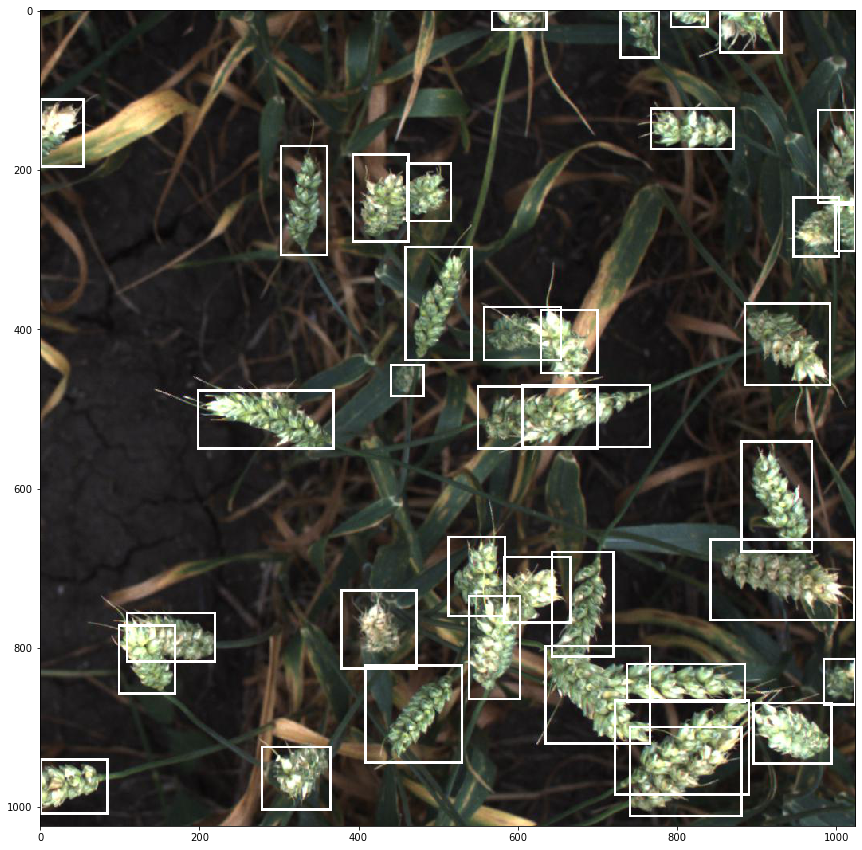

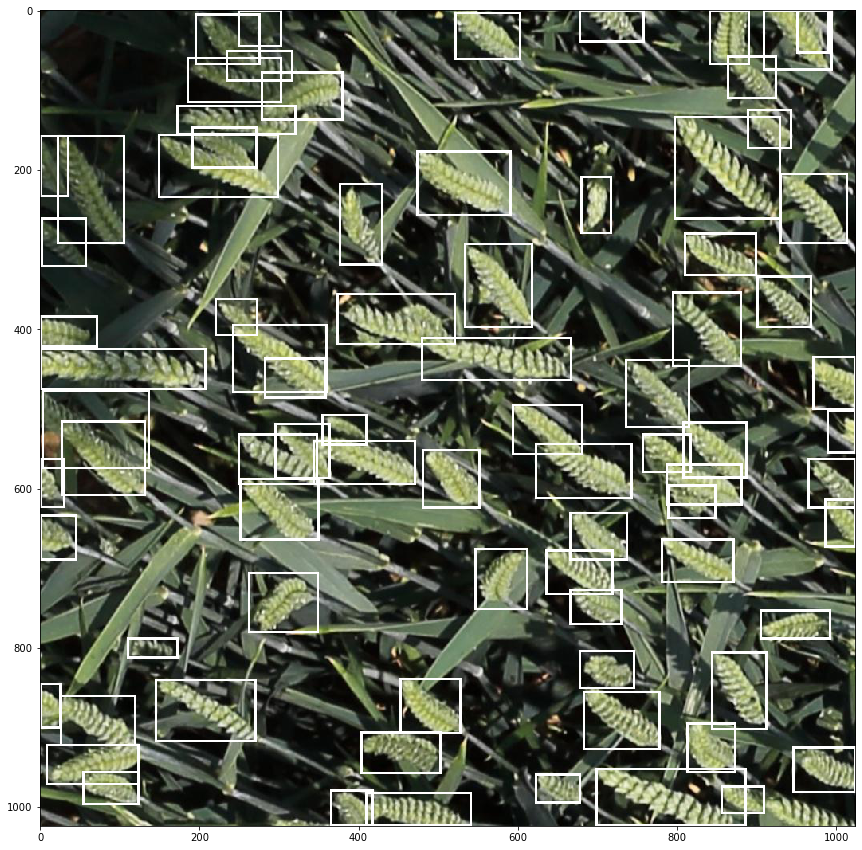

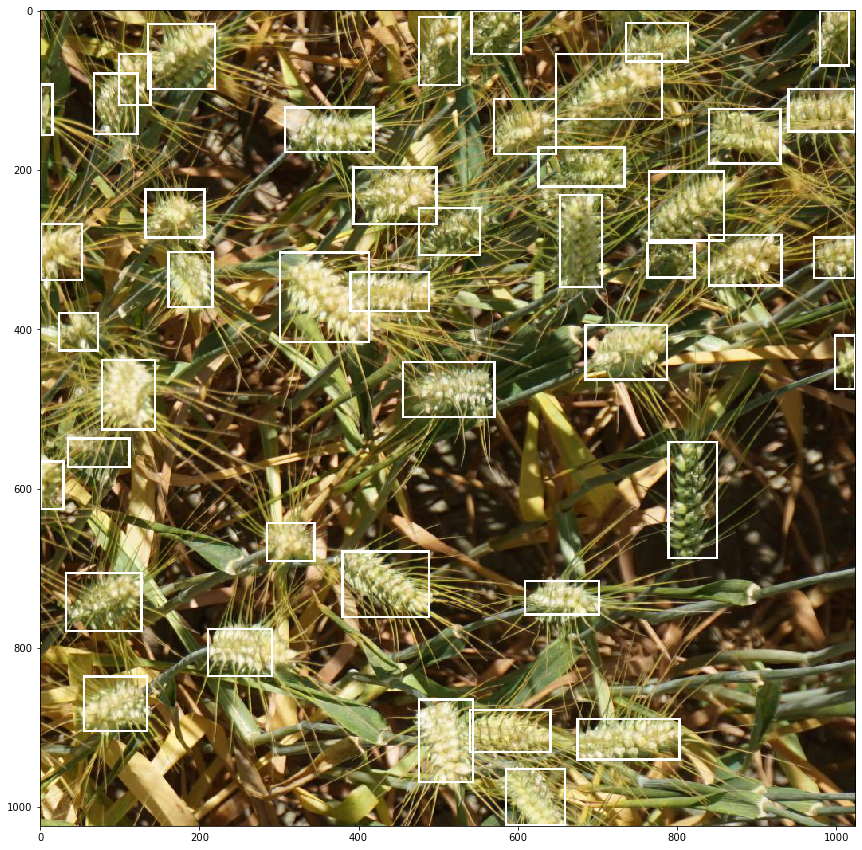

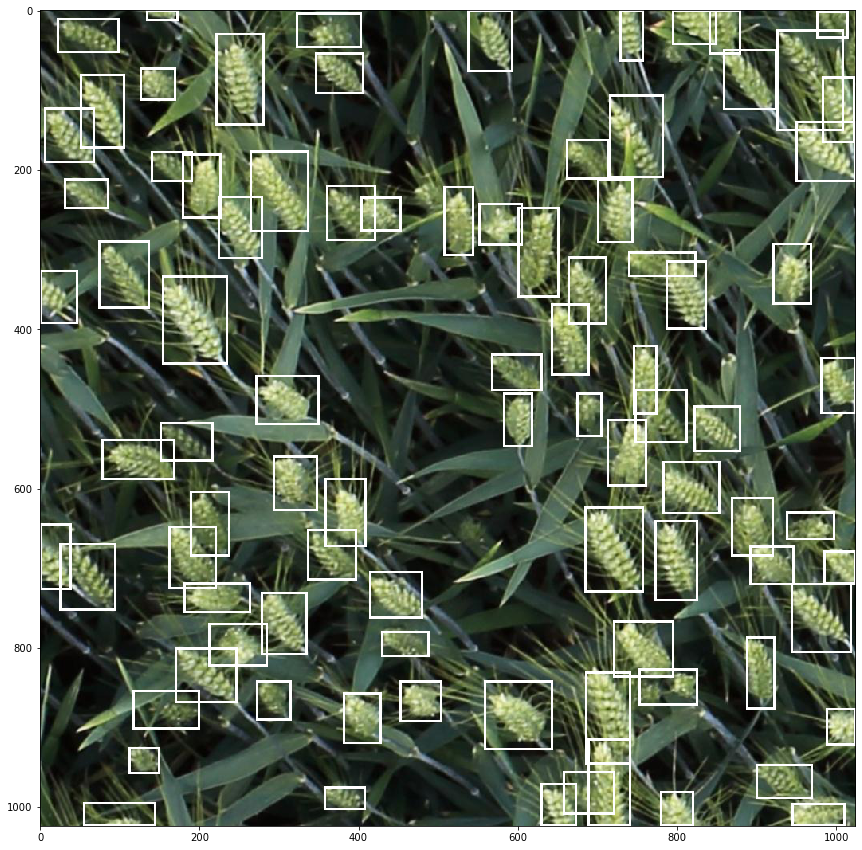

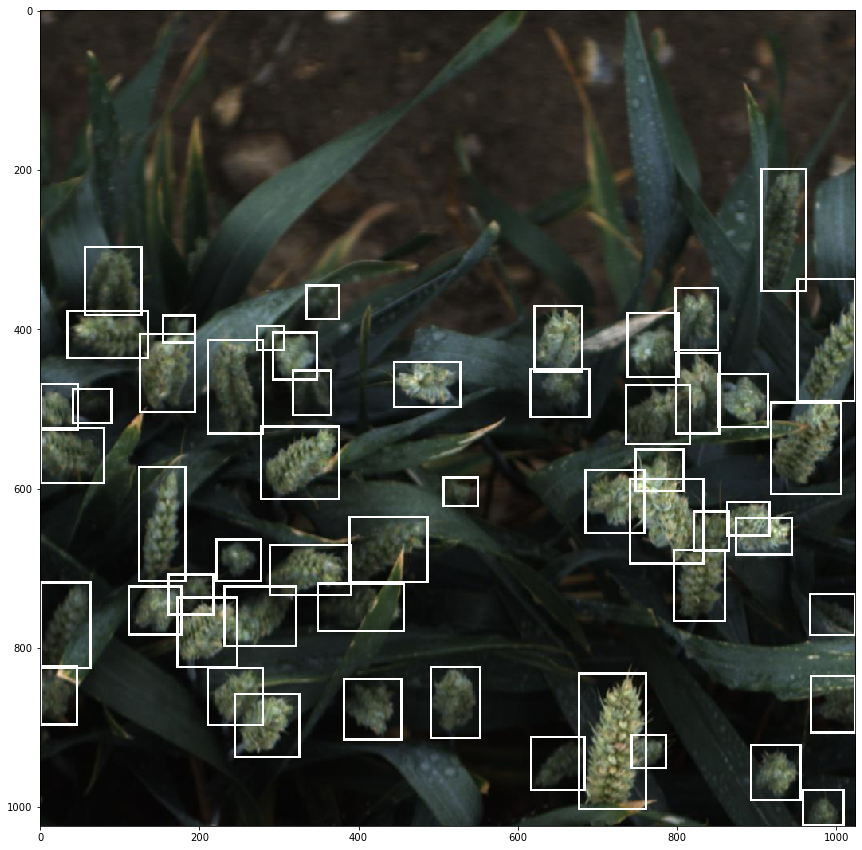

In [57]:
show_images(unique_images)